In [13]:
# Date of creation: 12-12-24
# Author: David Yang

### **Step 1: CpG Methylation Probability Pileup QC**

CpG methylation probability pileups generated by [pb-CpG-tools](https://github.com/PacificBiosciences/pb-CpG-tools) (v2.3.2) can produce incorrect results in two key scenarios:

1. **Variant Sites Appearing as Unmethylated CpGs**: When genetic variants disrupt CpG sites, these positions can be misinterpreted as CpGs with 0%/low methylation (>10%) probability. This creates "phantom" unmethylated CpG calls at variant locations.
2. **Denovo CpG Creation**: Variants can create new CpG sites on one haplotype that don't exist on the other. This leads to incorrect methylation calls when the non-CpG haplotype is interpreted as having unmethylated CpGs.

#### Workflow

**Input Files Required:**
- VCF file containing genetic variants
- Reference FASTA file
- CpG methylation BED files (combined, hap1, hap2)

**Analysis Steps:**
1. Identify variant positions affecting CpG sites
2. Detect destroyed reference CpGs and created denovo CpGs per haplotype
3. Filter methylation calls based on variant effects
4. Generate QC metrics and visualizations

**Output Files:**
- Filtered BED files with problematic sites removed
- Excluded sites BED files
- QC report with filtering statistics
- Distribution plots for passing and excluded sites


In [5]:
# Set up environment
import os
import sys

# Set up paths
bash_dir = "/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/bash"
bash_current = os.path.join(bash_dir, "pileup_QC")

print(bash_current)

/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/bash/pileup_QC


In [6]:
# Run the filtering script
sample_list = "/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/bash/pileup_QC/sample_list.txt"
config_file = "/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/bash/pileup_QC/config.yaml"
output_dir = "/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/pileup_QC"

# adjust paths in config file as needed

!sbatch $bash_current/submit_pileup_qc.sh $sample_list $config_file $output_dir


Submitted batch job 8219553


In [17]:
# Generate summary statistics and plots of the filtering results

import subprocess

# Run the script
results_dir = "/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/pileup_QC"
python_script = "/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/python/pileup_QC/summarize_qc.py"

subprocess.run(["python", python_script, "--results-dir", results_dir])


2024-12-11 21:29:10,993 - INFO - Starting multi-sample analysis
2024-12-11 21:29:17,383 - INFO - Analysis complete. Results in /gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker_12-12-24/outputs/pileup_QC/multi_sample_summary


CompletedProcess(args=['python', '/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker_12-12-24/python/pileup_QC/summarize_qc.py', '--results-dir', '/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker_12-12-24/outputs/pileup_QC'], returncode=0)

#### Note
A site is considered "preserved" if it meets these criteria:
- Has high methylation probability (>90%)
- Has good coverage (≥10 reads)
- Was initially marked for exclusion but isn't at a variant position


### **Step 2: Generate segmentation data**


In [3]:
# Set up environment
import os
import sys

# Set up paths
bash_dir = "/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/bash"
bash_current = os.path.join(bash_dir, "segmentation")

In [6]:
# Run the segmentation script

qc_dir="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/pileup_QC"
output_dir="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/segmentation"

!sbatch $bash_current/a_segment_samples.sh $qc_dir $output_dir



Submitted batch job 8199952


In [1]:
# Parse the segmentation results 

input="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/segmentation"
output="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/segmentation/regions_by_label"

!sbatch $bash_current/b_extract-regions.sh $input $output



Submitted batch job 8200788


### **Step 3: Generate candidate regions**


In [4]:

# Set up environment
import os
import sys

# Set up paths
bash_dir = "/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/bash"
bash_current = os.path.join(bash_dir, "candidate_regions")

In [6]:
# Step 3 Generate the consensus regions

# Data and summary graphs are generated in the candidate_regions directory
input_dir="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/segmentation/regions_by_label/regions"
output_dir="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/candidate_regions"


!sbatch $bash_current/a_consensus_regions.sh $input_dir $output_dir

Submitted batch job 8201362


###OUTDATED BELOW###

#### STEP 1: Generate segmentation data and prepare outputs for downstream analysis 
- Generate input consensus regions 

In [8]:
# Step 1a: Segment the samples using the following parameters
# - min CpGs = 5
# - max gap = 500bp

input_dir = "/gs/gsfs0/users/greally-lab/David/6_base-seq_SC1/WGS-analysis/outputs_compiled/20240501-results/cpg_pileup_beds"
output_dir = os.path.join(base_dir, "outputs/segmentation")

!sbatch $bash_script_path/1a_segment_samples.sh $input_dir $output_dir 

Submitted batch job 7988870


In [12]:
# Step 1b: Extract the regions by segmentation label

# Directory containing segmentation regions (output of previous step)
bed_dir="/gs/gsfs0/users/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/segmentation"

# Base output directory for extracted regions
output_base_dir=os.path.join(bed_dir, "regions_by_label")
print(output_base_dir)


# Run the script
!sbatch $bash_script_path/1b_extract-regions.sh $bed_dir $output_base_dir



/gs/gsfs0/users/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/segmentation/regions_by_label
sbatch: error: Unable to open file /1b_extract-regions.sh


In [3]:
# Step 1c: Extract the consensus regions
# Data and summary graphs are generated in the consensus_regions directory
input_dir="/gs/gsfs0/users/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/segmentation/regions_by_label"
output_dir="/gs/gsfs0/users/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/consensus_regions"

!sbatch $bash_script_path/1c_consensus_regions.sh $input_dir $output_dir

print(output_dir)


Submitted batch job 7991894
/gs/gsfs0/users/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/consensus_regions


#### STEP 2: Filter consensus regions based on methylated regions

In [4]:
# Step 2a: Filter the consensus regions
# Set up environment

import os
import sys

# Set up paths
bash_dir = "/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker_12-12-24/bash"
bash_current = os.path.join(bash_dir, "segmentation")

# Set script parameters



Submitted batch job 7991902
Submitted batch job 7991903


##### STEP 3: Stack the alleles for IGV viewing

This step generates color coded IGV viewable bed files for:
- Each sample's H1/H2 segmentation regions
- The filtered consensus regions (hits)
- The aggregated H1/H2 segmentation regions for all samples

In [6]:
# Step 3a: Generate allele stacks for IGV of the entire cohort
# Define paths
input_dir="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/segmentation"
output_dir="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/allele_stacks/all_samples"

!sbatch $bash_script_path/3a_IGV_all-samples.sh $input_dir $output_dir



Submitted batch job 7991908


In [9]:
# Step 3b: Create BED files for IGV viewing for the filtered consensus regions
# Define directories
input_dir="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/filtered_consensus_regions"
output_dir="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/allele_stacks/filtered_consensus"


!sbatch $bash_script_path/3b_consensus-IGV.sh $input_dir $output_dir

Submitted batch job 7991912


In [25]:
# Step 3c: Create BED files for IGV viewing each sample's H1 and H2 segments

# Define paths
input_dir="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/segmentation_regions"
output_dir="/gs/gsfs0/shared-lab/greally-lab/David/AlleleStacker_tests/AlleleStacker/outputs/allele_stacks/all_samples/sample_segmentation_haplotypes"

!sbatch $bash_script_path/3c_IGV-segmentation.sh $input_dir $output_dir



Submitted batch job 7973830


##### STEP 4: Prepare variants for mapping
This requries merging each sample's VCF for each variant type into a cohort wide VCF.
* Adjust file paths within each bash script

Each VCF was QC'ed with the following parameters for this run :


Merging:
bcftools merge
    --force-samples \
    --merge both \
    --file-list "$FILEPATHS" \
    --output-type z \

Small variants:
bcftools filter -i 'QUAL>=20 && DP>=10' 
bcftools annotate --set-id '%CHROM:%POS:%REF:%ALT'

SVs:
bcftools filter -i 'FILTER="PASS" && DP>=10'
bcftools annotate --set-id '%CHROM:%POS:%REF:%ALT:%SVANN'

CNVs:
bcftools filter -i 'QUAL>=20 && FILTER="PASS"
bcftools annotate --set-id '%CHROM:%POS:%REF:%ALT:%SVLEN' 

Tandem Repeats:
bcftools filter -i 'QUAL>=20 && FILTER="PASS"'
bcftools annotate --set-id '%CHROM:%POS:%REF:%ALT'

In [25]:
# merge each VCF type into a single cohort vcf using bcftools merge
# small variants
!sbatch $bash_script_path/4a_merge_small_vars.sh

Submitted batch job 7973107


In [24]:
# merge structural variants
!sbatch $bash_script_path/4b_merge_sv_vars.sh

Submitted batch job 7973104


In [29]:
# merge copy number variants
!sbatch $bash_script_path/4c_merge_CNVs_vars.sh

Submitted batch job 7973113


In [31]:
# merge tandem repeats
!sbatch $bash_script_path/4d_merge_repeats_vars.sh

# none remained after QC *

Submitted batch job 7973117


### Step 5: Map variants to regions

#### Haplotype-Specific Variant Mapping Analysis

Overview
Maps genetic variants to haplotype-specific methylated/unmethylated regions. Processes phased variants (SNPs, SVs) and unphased variants (CNVs, tandem repeats) from VCF files against methylation BED files.

Input Requirements
- BED file with methylation regions containing:
  - Chromosome, start, end positions
  - `methylated_samples` and `unmethylated_samples` columns
- Indexed VCF files (.vcf.gz + .tbi) for variants:
  - Small variants (SNPs/indels)
  - Copy number variants
  - Structural variants  
  - Tandem repeats

Output Format
Tab-separated file with columns:
```
chrom         Chromosome
start         Region start position
end           Region end position
variant_id    Unique variant identifier 
type          Variant type (small/cnv/sv/tr)
ref           Reference allele
alt           Alternative allele
num_meth      Number of samples with variant + methylation
num_unmeth    Number of samples with variant + unmethylation
meth_samples  Methylated samples with variant: sample:genotype
unmeth_samples Unmethylated samples with variant: sample:genotype
```
Haplotype Assignment
- Phased variants (small, sv): Uses `|`-separated genotypes, checking H1 (idx 0) or H2 (idx 1)
- Unphased variants (cnv, tr): Reports any non-reference genotype



In [2]:
# Runs a quick test of 50 randomly sampled regions
!sbatch $bash_script_path/test_map3.sh

Submitted batch job 7984124


In [ ]:
# !sbatch $bash_script_path/5_map_variants.sh

Submitted batch job 7984114


### Plot the # of regions per cohort size

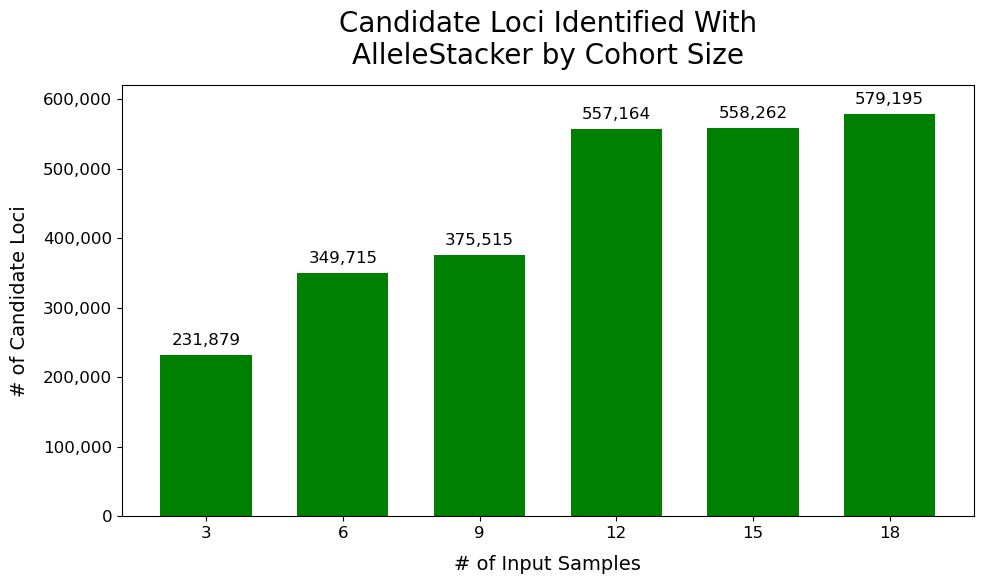

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Updated Data
samples = [3, 6, 9, 12, 15, 18]
loci = [231879, 349715, 375515, 557164, 558262, 579195]  # Updated loci values

# Set font sizes
plt.rcParams.update({'font.size': 12})
TITLE_SIZE = 20
LABEL_SIZE = 14
TICK_SIZE = 12

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(samples, loci, width=2.0, color='green')

# Add data labels on top of each bar with a margin
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10000,  # Added margin of 10,000
             f'{int(height):,}',
             ha='center', va='bottom',
             fontsize=TICK_SIZE)

# Customize the plot
plt.title('Candidate Loci Identified With\nAlleleStacker by Cohort Size', 
         fontsize=TITLE_SIZE, pad=15)
plt.xlabel('# of Input Samples', fontsize=LABEL_SIZE, labelpad=10)
plt.ylabel('# of Candidate Loci', fontsize=LABEL_SIZE, labelpad=10)

# Set y-axis limit with additional space
plt.ylim(0, 620000)  # Adjusted y-axis limit to provide more space at the top

# Set x-axis ticks to show every 3 samples
plt.xticks(np.arange(3, 19, 3), fontsize=TICK_SIZE)

# Format y-axis with comma separator instead of scientific notation
def format_func(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.yticks(fontsize=TICK_SIZE)

# Add border to the plot
plt.box(True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()